# Phase Diagram for the Syntectic System

Here we develop a free energy functional and phase diagram for a system with a syntectic transition

## Ideal Free Energy

---

The ideal free energy per unit area is of the following form

$$
\mathcal{F}_{id}[n] = \frac{1}{V_{cell}}\int_{cell} 
\frac{1}{2}n(x,y)^2 - \frac{\eta}{6} n(x,y)^3 + \frac{\chi}{12} n(x,y)^4
$$

To compute the phase diagram we use a variational method where we expand the reduced density, $n$, in the most general fourier series that is consistent with the symmetry of the bravais lattice.

$$
n(x,y) = n_0 + A_1 n_1(x,y) + A_2 n_2(x,y) + ...
$$

We then expand out the ansatz and compute each integral over the unit-cell numerically to find the amplitude equation for the ideal free energy

In [1]:
using PyPlot
using Interact
using Maxima
using Optim
using PhaseDiagrams

Connecting Maxima to server on port 8081


In [2]:
f_ideal = m"n^2/2 - η*n^3/6 + χ*n^4/12"

 
                                4      3      2
                               n  χ   n  η   n
                               ---- - ---- + --
                                12     6     2

In [3]:
n = m"n0 + 2*A*n1"            # + A[2]*n2"

f_ideal = subst(n, :n, f_ideal)

 
                          4                  3                  2
             (2 A n1 + n0)  χ   (2 A n1 + n0)  η   (2 A n1 + n0)
             ---------------- - ---------------- + --------------
                    12                 6                 2

In [4]:
f_ideal = expand(f_ideal)

 
    4   4        3      3                            3          4
 4 A  n1  χ   8 A  n0 n1  χ      2   2   2     2 A n0  n1 χ   n0  χ
 ---------- + ------------- + 2 A  n0  n1  χ + ------------ + -----
     3              3                               3          12
      3   3                                    3                              2
   4 A  n1  η      2      2         2        n0  η      2   2               n0
 - ---------- - 2 A  n0 n1  η - A n0  n1 η - ----- + 2 A  n1  + 2 A n0 n1 + ---
       3                                       6                             2

In [5]:
n1 = m"cos(4*%pi/sqrt(3)*(sqrt(3)*x/2 - y/2)) + 
       cos(4*%pi/sqrt(3)*(sqrt(3)*x/2 + y/2)) + 
       cos(4*%pi/sqrt(3)*y)"

n2 = m"cos(4*%pi*x) +
       cos(4*%pi*(x/2 + sqrt(3)*y/2)) + 
       cos(4*%pi*(-x/2 + sqrt(3)*y/2))"

f_ideal = subst(n1, :n1, f_ideal)
#f_ideal = subst(n2, :n2, f_ideal);

In [6]:
F_ideal = "integrate(integrate($f_ideal, x, 0, 1), y, 0, sqrt(3)/2)" |> MExpr;

In [7]:
F_ideal = mcall(F_ideal)

 
            3/2       4       7/2      2   2       5/2      3
 ((- ((- 2 3    %pi n0 ) - 8 3    %pi A  n0  - 32 3    %pi A  n0
       7/2      4           3/2       3      7/2      2          5/2      3
 - 20 3    %pi A ) χ) - (4 3    %pi n0  + 8 3    %pi A  n0 + 16 3    %pi A ) η
      5/2       2      7/2      2
 + 4 3    %pi n0  + 8 3    %pi A )/(144 %pi)

In [8]:
F_ideal = ratsimp(F_ideal)
F_ideal = "$F_ideal/(sqrt(3)/2)" |> MExpr |> mcall
F_ideal = ratsimp(F_ideal)
F_ideal = float(F_ideal)
F_ideal = expand(F_ideal)

 
                       4          2   2          3             4
 0.08333333333333333 n0  χ + 3.0 A  n0  χ + 4.0 A  n0 χ + 7.5 A  χ
                                3          2             3           2        2
         - 0.1666666666666667 n0  η - 3.0 A  n0 η - 2.0 A  η + 0.5 n0  + 3.0 A

In [9]:
F_id_exp = parse(F_ideal)                # Make julia expression of the ideal free energy
@eval F_id(η, χ, n0, A) = $F_id_exp     # Make julia function from the expression

F_id (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(1.4, nactions=1),"η",1.4,"1.4",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8),Dict(1.4=>"1.4",1.2=>"1.2",1.1=>"1.1",1.3=>"1.3",1.5=>"1.5",1.6=>"1.6",1.8=>"1.8",1.7=>"1.7",1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.1, nactions=1),"n0",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.04=>"0.04",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.0=>"0.0",0.15=>"0.15",0.01=>"0.01",0.2=>"0.2",0.07=>"0.07",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

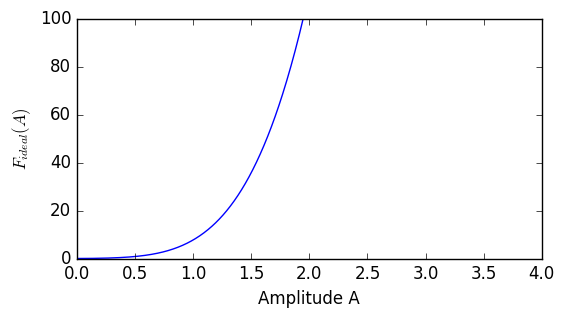

In [10]:
let
    A = linspace(0.0, 4.0, 1000)
    ff = Array(Float64, 1000)
    f = figure(figsize=(6, 3))

    @manipulate for η in 1.0:0.1:1.8, n0 in 0.0:0.01:0.2
        withfig(f) do
            for i in 1:1000
                ff[i] = F_id(η, 1.0, n0, A[i])
            end
            plot(A, ff)
            ylim(0, 100)
            xlabel("Amplitude A")
            ylabel(L"F_{ideal}(A)")
        end
    end
end

## Free Energy of Mixing

The free energy of mixing is of the following form:

$$
    \mathcal{F}_{mix}[c] = \frac{\omega}{V_{cell}}\int_{cell} 
    (1 + n_0)\left(c \log\left(\frac{c}{c_0}\right) + 
    (1-c) \log\left(\frac{1-c}{1-c_0}\right)\right) + \frac{\epsilon(T)}{2}(c-c_0)^2
$$

In equilibrium we can assume that the concentration is constant so the integral just cancels the factor of the volume of the unit cell. The term $\epsilon(T)$ is the enthaply of mixing term which we model as, 

$$
\epsilon(T) = -4 + \epsilon_0 (T - T_0),
$$

where $T_0$ is the spinodal temperature of the liquid

In [11]:
 F_mix(c, T, n₀, ϵ₀, T₀, ω) = ω*((1+n₀)*(c*log(2.0*c) + (1-c)*log(2.0*(1-c))) + (-4.0 + ϵ₀*(T-T₀))/2*(c-0.5)^2)

F_mix (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.2, nactions=1),"ω",0.2,"0.2",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.3=>"0.3",0.04=>"0.04",0.32=>"0.32",0.26=>"0.26",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.25=>"0.25",0.35=>"0.35",0.0=>"0.0"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.3, nactions=1),"T",0.3,"0.3",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.06=>"0.06",0.05=>"0.05",0.48=>"0.48"…)),Any[],Any[],true,"horizontal")

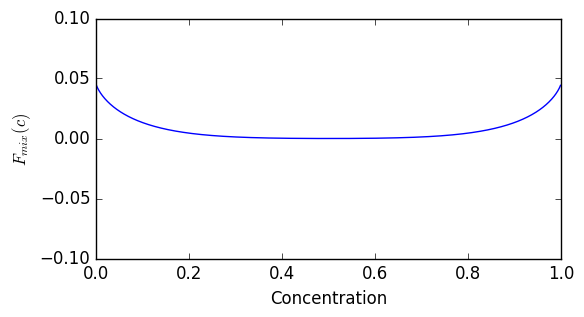

In [12]:
let
    N = 1000
    c = linspace(0.001, 0.999, N)
    ff = Array(Float64, N)
    f = figure(figsize=[6, 3])
    @manipulate for ω in 0.0:0.01:0.4, T in 0.0:0.01:0.60
        withfig(f) do
            for i in 1:N
                ff[i] = F_mix(c[i], T, 0.05, 20.0, 0.30, ω)
            end
            plot(c, ff)
            xlim(0, 1)
            ylim(-0.1, 0.1)
            xlabel("Concentration")
            ylabel(L"F_{mix}(c)")
        end
    end
end

## Correlation functions

There are a variety of effective pair correlation functions we can choose from. Here is one of them from the original xpfc paper

In [13]:
k′ = 2π
α = 0.8
β = 6.0
ρ = sqrt(3)/2.0
αc = 0.5
c₀ = 0.5

C_eff(k, c, T) = c^2*exp(-T^2*k′^2/(2*β*ρ))*exp(-(k-k′)^2/(2*α^2))

C_eff (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"c",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"T",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

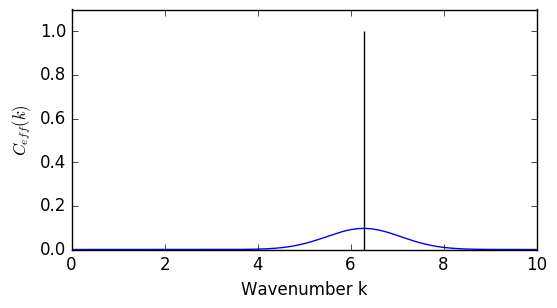

In [14]:
let
    N = 400
    k = linspace(0.0, 10.0, N)
    CC = Array(Float64, N)
    f = figure(figsize=[6, 3])
    @manipulate for c in 0.0:0.01:1.0, T in 0.0:0.01:1.0
        withfig(f) do
            for i in 1:N
                CC[i] = C_eff(k[i], c, T)
            end
            kmax = 2π
            plot(k, CC)
            vlines(kmax, 0.0, 1.0)
            xlim(0, 10)
            ylim(0, 1.1)
            xlabel("Wavenumber k")
            ylabel(L"$C_{eff}(k)$")
        end 
    end
end

## Excess Free Energy

The excess free energy term in the binary phase field crystal model is the form

$$
\mathcal{F}_{ex}[n, c] = -\frac{1}{2 V_{cell}}\int_{cell} dr \int dr^\prime n(r) C_{eff}(r, r^\prime; c) n(r^\prime)
$$

Most of the modes in the amplitude expansion cancel out but we're left with the following at the end of the day:

$$
\mathcal{F}_{ex}[n, c] = -\frac{1}{2 V_{cell}}(n_0^2 C_{eff}(k=0, c) + 6 A_1^2 C_{eff}(k=k_1, c) + 6 A_2^2 C_{eff}(k=k_2, c))
$$

In [17]:
function F_ex(c, T, A)
    k = k′
    return (-3.0*A^2*C_eff(k, c, T))       # + 6.0*A[2]^2*C_eff(k[2], c, T))
end

F_ex (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"η",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.491, nactions=1),"c",0.491,"0.491",Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.011"=>0.011,"0.021"=>0.021,"0.031"=>0.031,"0.041"=>0.041,"0.051000000000000004"=>0.051,"0.061"=>0.061,"0.07100000000000001"=>0.071,"0.081"=>0.081,"0.091"=>0.091…),Dict(0.411=>"0.41100000000000003",0.921=>"0.921",0.431=>"0.431",0.211=>"0.211",0.231=>"0.231",0.151=>"0.151",0.051=>"0.051000000000000004",0.041=>"0.041",0.011=>"0.011",0.791=>"0.791"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.15, nactions=1),"T",0.15,"0.15",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.3=>"0.3",0.04=>"0.04",0.26=>"0.26",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.25=>"0.25",0.0=>"0.0",0.28=>"0.28",0.22=>"0.22"…)),Any[],Any[],true,"horizontal")

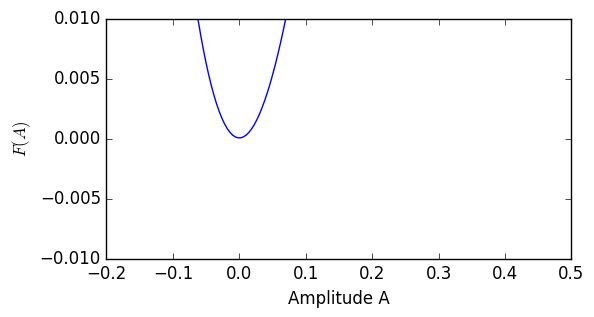

In [18]:
let
    N = 1000
    A = linspace(-2.0, 2.0, N)
    ff = Array(Float64, N)
    f = figure(figsize=(6, 3))
    n₀ = 0.0
    ϵ₀ = 20.0
    T₀ = 0.30
    ω = 0.02
    @manipulate for η in 1.0:0.1:3.0, c in 0.001:0.01:0.999, T in 0.0:0.01:0.3
        withfig(f) do
            for i in 1:N
                ff[i] = F_ex(c, T, A[i]) + F_id(η, 1.0, 0.01, A[i]) + F_mix(c, T, n₀, ϵ₀, T₀, ω)
            end
            plot(A, ff)
            ylim(-0.01,0.01)
            xlim(-0.2, 0.5)
            xlabel("Amplitude A")
            ylabel(L"F(A)")
        end
    end
end

## Total free energy

The total free energy is sum of all the above terms

In [19]:
F(c, T, η, χ, ϵ₀, T₀, ω, n₀, A) = F_mix(c, T, n₀, ϵ₀, T₀, ω) + F_ex(c, T, A)+ F_id(η, χ, n₀, A) 

F (generic function with 1 method)

In [26]:
function F(c, T, η, χ, ϵ₀, T₀, ω, n₀)
    sol = optimize(A -> F(c, T, η, χ, ϵ₀, T₀, ω, n₀, A), 0.0, 10.0)
    #println("Amplitude at concentation $c and temperature $T is $(sol.minimum)")
    return sol.minimum
end

F (generic function with 3 methods)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.4901, nactions=1),"c",0.4901,"0.4901",Interact.OptionDict(DataStructures.OrderedDict("0.0001"=>0.0001,"0.0101"=>0.0101,"0.0201"=>0.0201,"0.0301"=>0.0301,"0.040100000000000004"=>0.0401,"0.050100000000000006"=>0.0501,"0.0601"=>0.0601,"0.07010000000000001"=>0.0701,"0.0801"=>0.0801,"0.0901"=>0.0901…),Dict(0.3201=>"0.3201",0.9401=>"0.9401",0.3301=>"0.3301",0.4801=>"0.48009999999999997",0.5101=>"0.5101",0.8601=>"0.8601",0.7101=>"0.7101",0.9701=>"0.9701",0.0701=>"0.07010000000000001",0.1901=>"0.1901"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.1, nactions=1),"T",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.001"=>0.001,"0.002"=>0.002,"0.003"=>0.003,"0.004"=>0.004,"0.005"=>0.005,"0.006"=>0.006,"0.007"=>0.007,"0.008"=>0.008,"0.009"=>0.009…),Dict(0.117=>"0.117",0.2=>"0.2",0.192=>"0.192",0.022=>"0.022",0.004=>"0.004",0.11=>"0.11",0.189=>"0.189",0.171=>"0.171",0.036=>"0.036",0.145=>"0.145"…)),Any[],Any[],true,"horizontal")

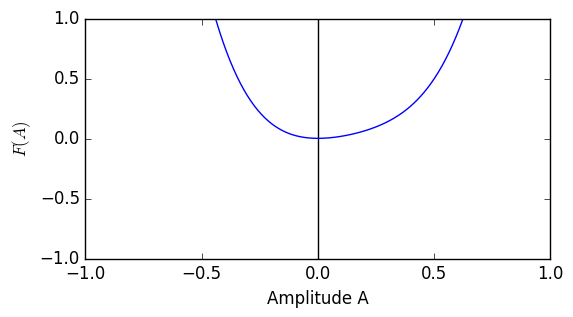

In [27]:
let
    N = 1000
    A = linspace(-2.0, 3.0, N)
    ff = Array(Float64, N)
    f = figure(figsize=(6, 3))
    η = 2.0
    χ = 1.0
    local ϵ₀ = 0.0
    local T₀ = 0.0
    n₀ = 0.05
    ω = 0.02
    @manipulate for c in 0.0001:0.01:0.9999, T in 0.0:0.001:0.20
        withfig(f) do
            for i in 1:N
                ff[i] = F(c, T, η, χ, ϵ₀, T₀, ω, n₀, A[i])
            end
            A_min = optimize(A -> F(c, T, η, χ, ϵ₀, T₀, ω, n₀, A), 0.0, 7.0).minimizer
            plot(A, ff)
            vlines(A_min, -1, 1)
            ylim(-1,1)
            xlim(-1, 1)
            xlabel("Amplitude A")
            ylabel(L"F(A)")
        end
    end
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.2, nactions=1),"T",0.2,"0.2",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.001"=>0.001,"0.002"=>0.002,"0.003"=>0.003,"0.004"=>0.004,"0.005"=>0.005,"0.006"=>0.006,"0.007"=>0.007,"0.008"=>0.008,"0.009"=>0.009…),Dict(0.259=>"0.259",0.117=>"0.117",0.265=>"0.265",0.22=>"0.22",0.207=>"0.207",0.2=>"0.2",0.293=>"0.293",0.272=>"0.272",0.392=>"0.392",0.221=>"0.221"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"η",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

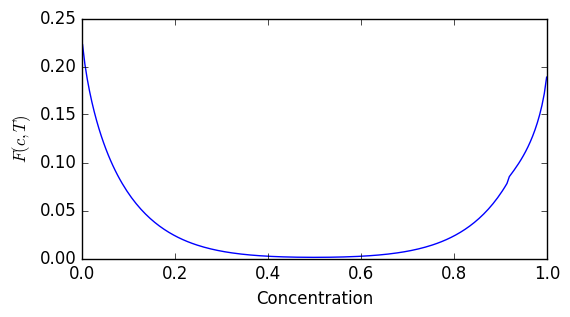

In [28]:
let
    N = 200
    c = linspace(0.001, 0.999, N)
    ff = Array(Float64, N)
    f = figure(figsize=[6, 3])
    const χ = 1.0
    const ϵ₀= 10.0
    const T₀= 0.20
    const n₀ = 0.05
    const ω = 1.0
    @manipulate for T in 0.0:0.001:0.4, η in 1.0:0.1:3.0
        withfig(f) do
            for i in 1:N
                ff[i] = F(c[i], T, η, χ, ϵ₀, T₀, ω, n₀)
            end
            plot(c, ff)
            xlim(0, 1)
            xlabel("Concentration")
            ylabel(L"F(c, T)")
        end
    end
end

In [29]:
pygui(false)

false

In [30]:
const η = 2.0
const χ = 1.0
const ϵ₀ = 30.0
const T₀ = 0.15
const ω = 0.3
const n₀ = 0.05

F(c, T) = F(c, T, η, χ, ϵ₀, T₀, ω, n₀)

F (generic function with 3 methods)

In [31]:
function make_phase_diagram(crnge, Trnge)
    T_vals = Float64[] 
    c_vals = Float64[]
    
    c = collect(crnge)
    T = collect(Trnge)
    
    f = Array(Float64, length(c))
    
    for t in 1:length(T)
        for cc in 1:length(c)
            f[cc] = F(c[cc], T[t])
        end
        arr = commontangent(f)
        for domain in arr
            for point in domain
                push!(T_vals, T[t])
                push!(c_vals, c[point])
            end
        end
    end
    return T_vals, c_vals
end

make_phase_diagram (generic function with 1 method)

In [32]:
crnge = 0.001:0.001:0.999
Trnge = 0.00:0.010:0.35

T_vals, c_vals = make_phase_diagram(crnge, Trnge)

([0.0,0.0,0.01,0.01,0.02,0.02,0.03,0.03,0.04,0.04  …  0.25,0.25,0.26,0.26,0.27,0.27,0.28,0.28,0.29,0.29],[0.014,0.999,0.017,0.999,0.02,0.999,0.023,0.999,0.027,0.999  …  0.951,0.985,0.966,0.989,0.975,0.993,0.986,0.997,0.996,0.999])

In [ ]:
f = figure()
withfig(f) do
    scatter(c_vals, T_vals, c="k")
    grid(false)
    xlim(0, 1)
    ylim(0.00, 0.40)
    xlabel(L"Concentration $(c)$")
    ylabel(L"Temperature $(T)$")
    title("Nanocrystalline Phase Diagram")
end

savefig("Nanocrystalline Phase Diagram.svg")

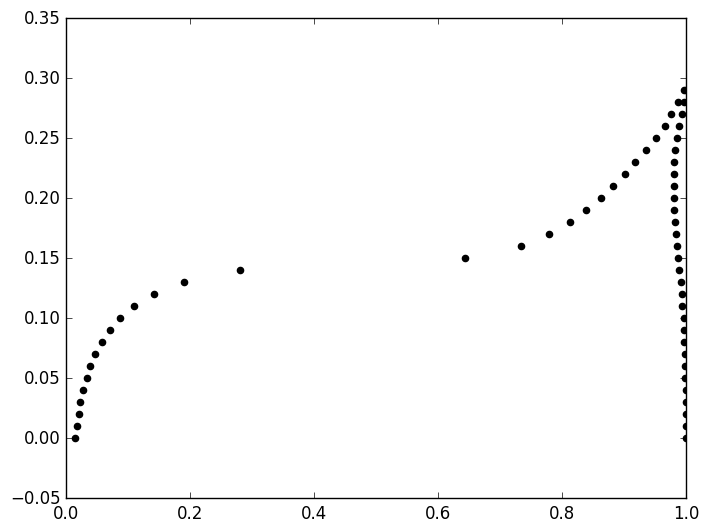

In [33]:
scatter(c_vals, T_vals, c="k")
xlim(0, 1)
grid(false)